In [1]:
import os
os.chdir('../..')

In [37]:
import numpy as np
import json
import pandas as pd
import time

import statsmodels.api as sm

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

from classes.helpers import *

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

colors = {'ba': 'b', 'rb': 'r'}
labels = {'ba': 'BeerAdvocate', 'rb': 'RateBeer'}

data_folder = '../data/'

func = [lambda x: np.percentile(x, 10), 
        lambda x: np.percentile(x, 25), 
        lambda x: np.percentile(x, 50), 
        lambda x: np.percentile(x, 75),
        lambda x: np.percentile(x, 90),
        lambda x: np.mean(x),
        lambda x: np.std(x)]

names = ['Quantile 10',
         'Quantile 25',
         'Quantile 50',
         'Quantile 75',
         'Quantile 90',
         'Average',
         'STD']

# Sanity Check for the Matching

In [93]:
def qq_plot(arr1, arr2):
    arr1 = np.array(arr1)
    arr1.sort()
    levels1 = np.arange(len(arr1),dtype=float)/len(arr1)
    
    arr2 = np.array(arr2)
    arr2.sort()
    levels2 = np.arange(len(arr2),dtype=float)/len(arr2)
    
    if len(arr1) <= len(arr2):
        quantiles1 = arr1
        quantiles2 = np.interp(levels1, levels2, arr2)
    else:
        quantiles1 = np.interp(levels2, levels1, arr1)
        quantiles2 = arr2
    return quantiles1, quantiles2

## Average rating

In [65]:
min_nbr_ratings = 10
matched = pd.read_csv(data_folder + 'matched/beers.csv', header=[0,1])
matched = matched[(matched['ba']['nbr_ratings'] >= min_nbr_ratings) & (matched['rb']['nbr_ratings'] >= min_nbr_ratings)]

df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/beers.csv')
df['ba'] = df['ba'][df['ba']['nbr_ratings'] >= min_nbr_ratings]

df['rb'] = pd.read_csv(data_folder + 'rb/beers.csv')
df['rb'] = df['rb'][df['rb']['nbr_ratings'] >= min_nbr_ratings]

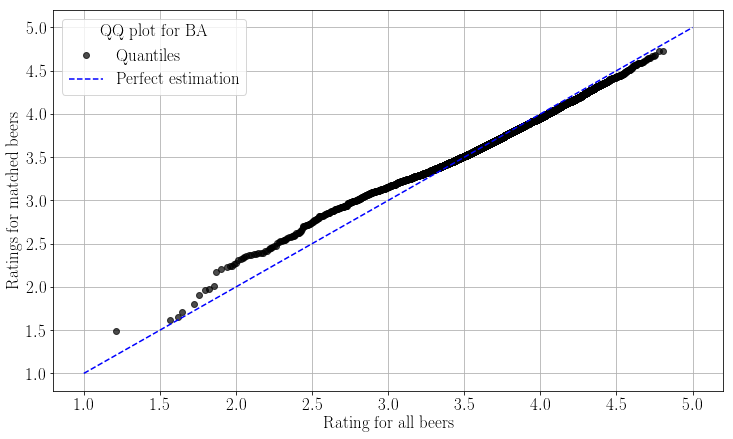

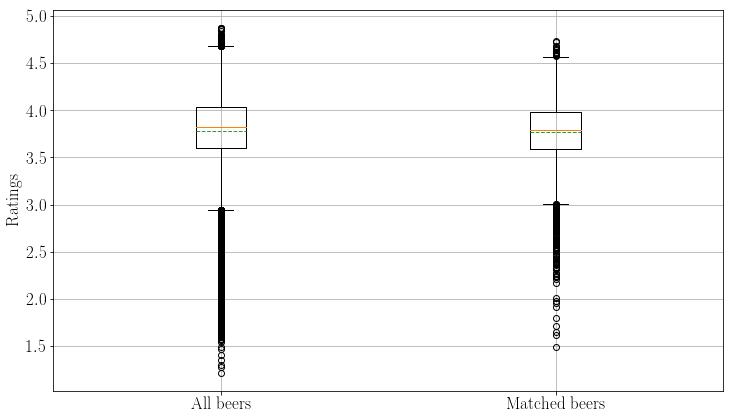

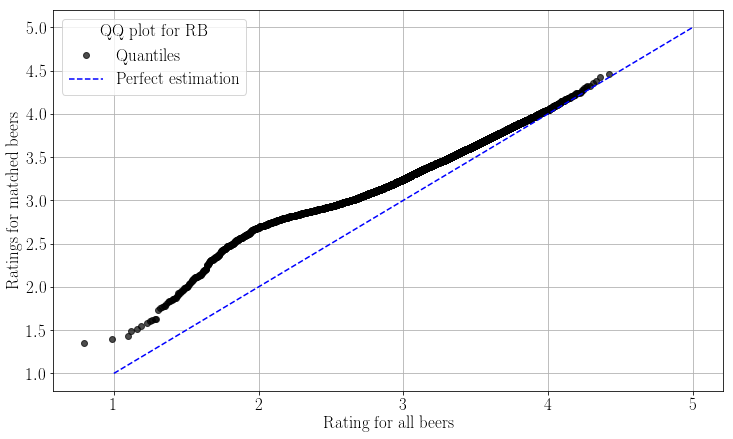

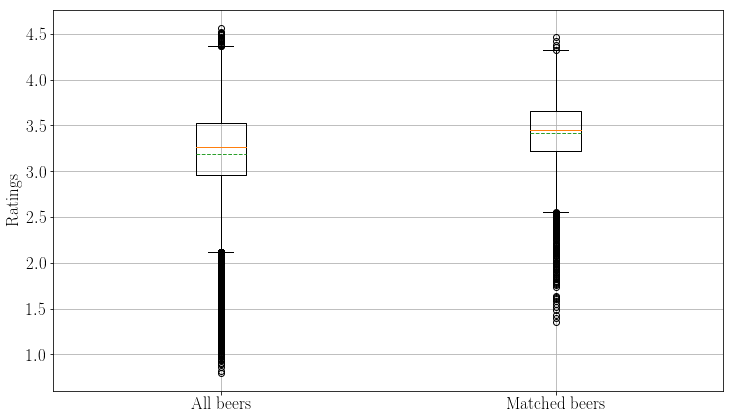

In [69]:
for key in df.keys():
    # QQ PLOTS
    plt.figure(figsize=(12,7))
    plt.rc('font', family='serif')
    plt.rc('font', size=17)
    
    quantiles1, quantiles2 = qq_plot(df[key]['avg_computed'], matched[key]['avg_computed'])
        
    plt.plot(quantiles1, quantiles2, 'ok', alpha=0.7, label='Quantiles')
    plt.plot([1, 5], [1, 5], 'b--', label='Perfect estimation')

    plt.grid()
    plt.xlabel('Rating for all beers')
    plt.ylabel('Ratings for matched beers')
    plt.legend(title='QQ plot for {}'.format(key.upper()))
    plt.show()
    
    # BOXPLOTS
    plt.figure(figsize=(12,7))
    plt.rc('font', family='serif')
    plt.rc('font', size=17)
    
    plt.boxplot([df[key]['avg_computed'], matched[key]['avg_computed']], showmeans=True, meanline=True)
    plt.grid()
    plt.ylabel('Ratings')
    plt.xticks([1, 2], ['All beers', 'Matched beers'])
    plt.show()
    

## Number ratings per beer

In [94]:
matched = pd.read_csv(data_folder + 'matched/beers.csv', header=[0,1])

df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/beers.csv')
df['rb'] = pd.read_csv(data_folder + 'rb/beers.csv')

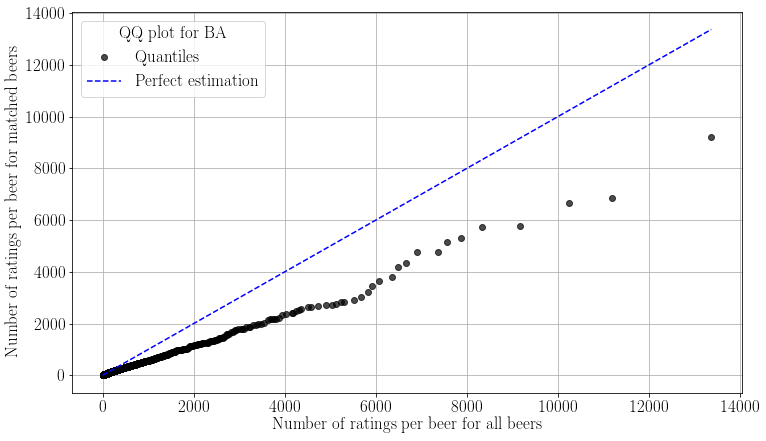

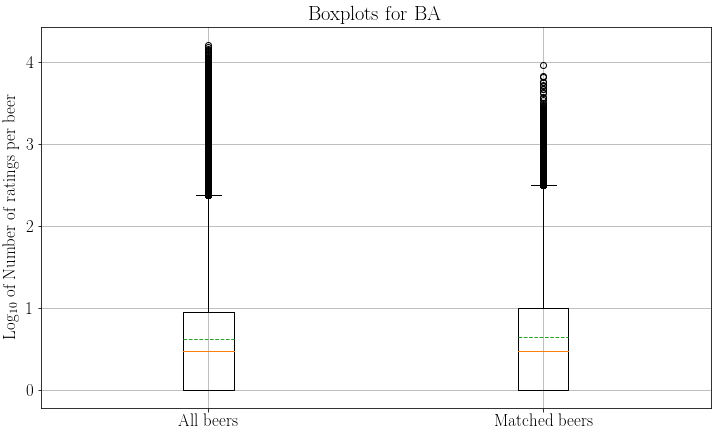

BA; All: 16509.000; Matched: 9228.000


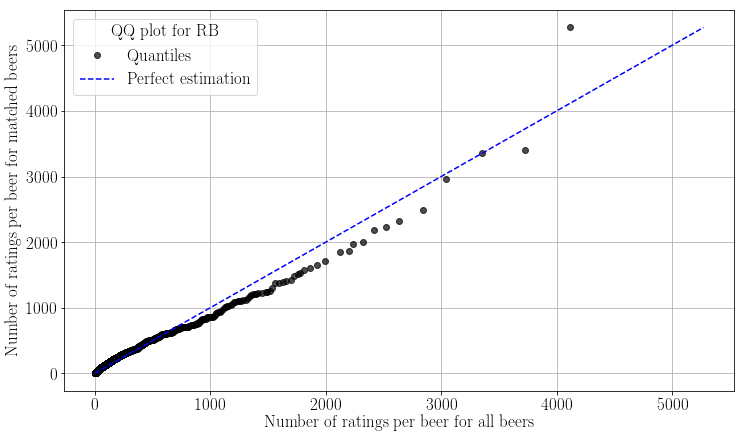

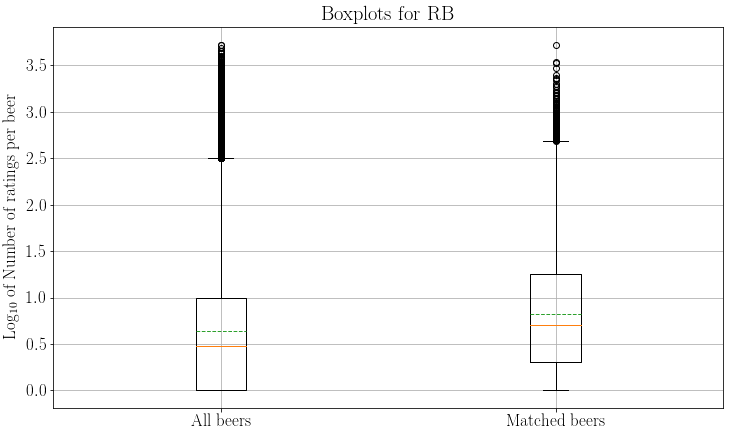

RB; All: 5272.000; Matched: 5272.000


In [97]:
for key in df.keys():
    # QQ PLOTS
    plt.figure(figsize=(12,7))
    plt.rc('font', family='serif')
    plt.rc('font', size=17)
    
    arr1 = np.array(df[key]['nbr_ratings'])
    arr1 = arr1[arr1>0]
    
    arr2 = np.array(matched[key]['nbr_ratings'])
    arr2 = arr2[arr2>0]
    
    quantiles1, quantiles2 = qq_plot(arr1, arr2)
        
    plt.plot(quantiles1, quantiles2, 'ok', alpha=0.7, label='Quantiles')
    plt.plot([0, max(np.max(quantiles1),np.max(quantiles2))], [0, max(np.max(quantiles1),np.max(quantiles2))], 'b--', label='Perfect estimation')

    plt.grid()
    plt.xlabel('Number of ratings per beer for all beers')
    plt.ylabel('Number of ratings per beer for matched beers')
    plt.legend(title='QQ plot for {}'.format(key.upper()))
    plt.show()
    
    # BOXPLOTS
    plt.figure(figsize=(12,7))
    plt.rc('font', family='serif')
    plt.rc('font', size=17)
    
    plt.boxplot([np.log10(arr1), np.log10(arr2)], showmeans=True, meanline=True)
    plt.grid()
    plt.ylabel('Log$_{10}$ of Number of ratings per beer')
    plt.xticks([1, 2], ['All beers', 'Matched beers'])
    plt.title('Boxplots for {}'.format(key.upper()))
    plt.show()
    
    print('{}; All: {:.3f}; Matched: {:.3f}'.format(key.upper(), np.max(arr1), np.max(arr2)))

## Number beers per brewery

In [60]:
df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/breweries.csv')
df['rb'] = pd.read_csv(data_folder + 'rb/breweries.csv')

matched = pd.read_csv(data_folder + 'matched/beers.csv', header=[0,1])
brew = matched['ba']['brewery_name'].unique()
arr = []
for b in brew:
    arr.append(len(matched[matched['ba']['brewery_name'] == b]))

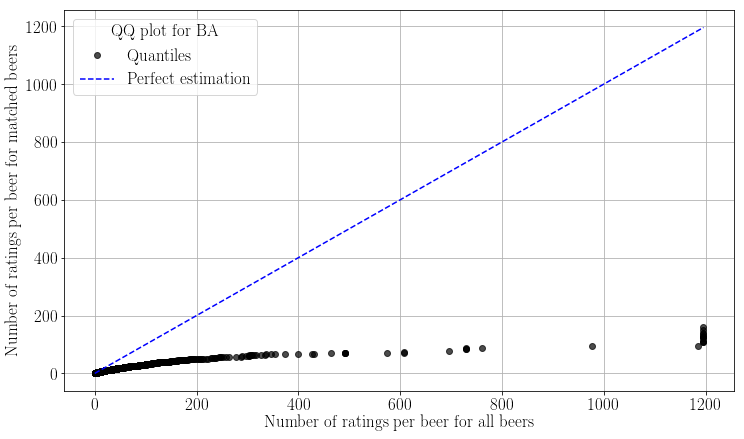

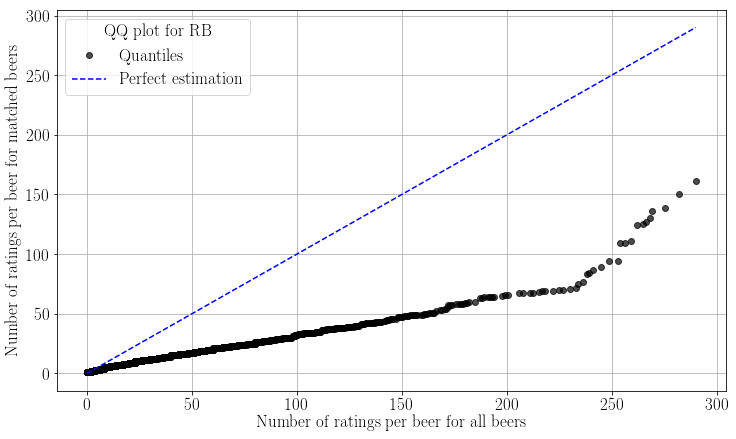

In [61]:
for key in df.keys():

    plt.figure(figsize=(12,7))
    plt.rc('font', family='serif')
    plt.rc('font', size=17)

    #res1 = stats.probplot(df[key]['nbr_beers'])
    #plt.plot(res1[0][0], res1[0][1], 'ob', alpha=0.7, label = 'All beers')
    #res2 = stats.probplot(arr)
    #plt.plot(res2[0][0], res2[0][1], 'or', alpha=0.7, label = 'Matched beers')

    #plt.grid()
    #plt.xlabel('Theoretical quantiles')
    #plt.ylabel('Ordered Values')
    #plt.legend(title = 'Number of beers per brewery on {}'.format(key.upper()))
    #plt.show()
    
    quantiles1, quantiles2 = qq_plot(df[key]['nbr_beers'], arr)
        
    plt.plot(quantiles1, quantiles2, 'ok', alpha=0.7, label='Quantiles')
    plt.plot([0, max(np.max(quantiles1),np.max(quantiles2))], [0, max(np.max(quantiles1),np.max(quantiles2))], 'b--', label='Perfect estimation')

    plt.grid()
    plt.xlabel('Number of beers per breweries for all breweries')
    plt.ylabel('Number of beers per breweries for matched breweries')
    plt.legend(title='QQ plot for {}'.format(key.upper()))
    plt.show()

In [77]:
df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/breweries.csv')
df['rb'] = pd.read_csv(data_folder + 'rb/breweries.csv')

matched = pd.read_csv(data_folder + 'matched/breweries.csv', header=[0,1])

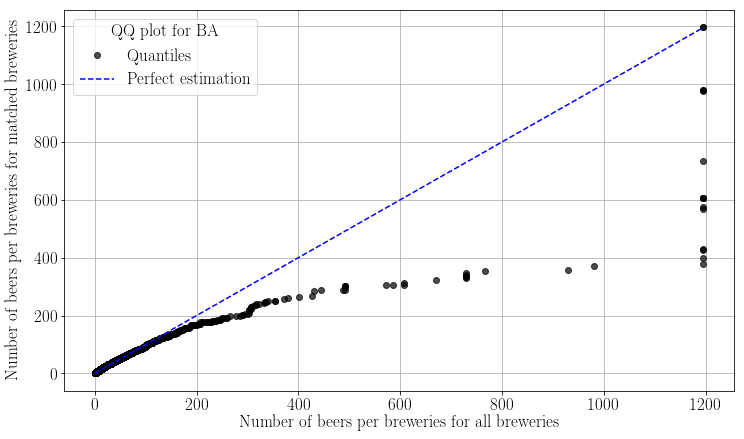

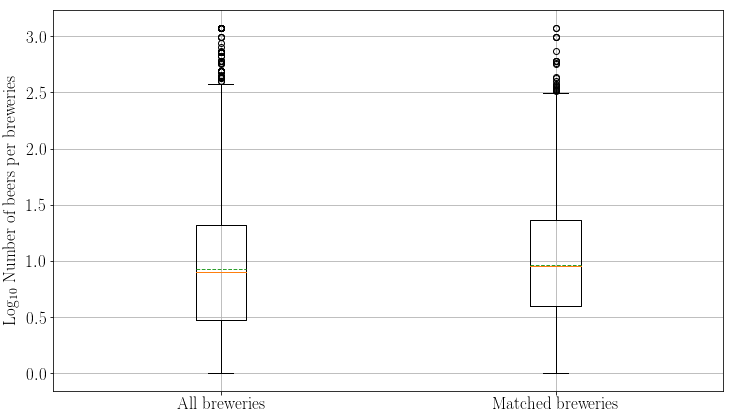

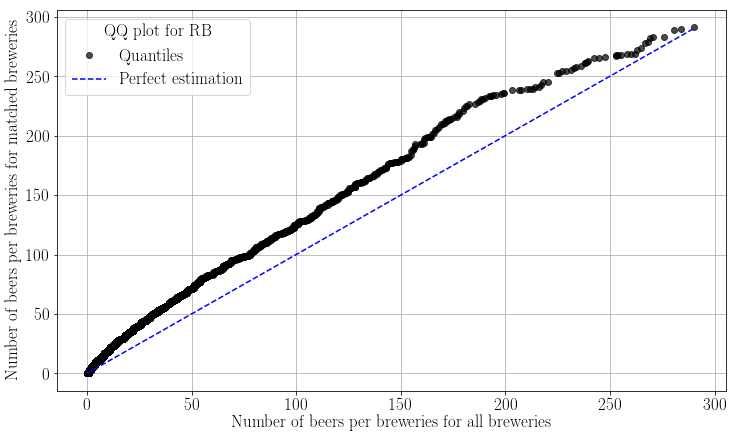

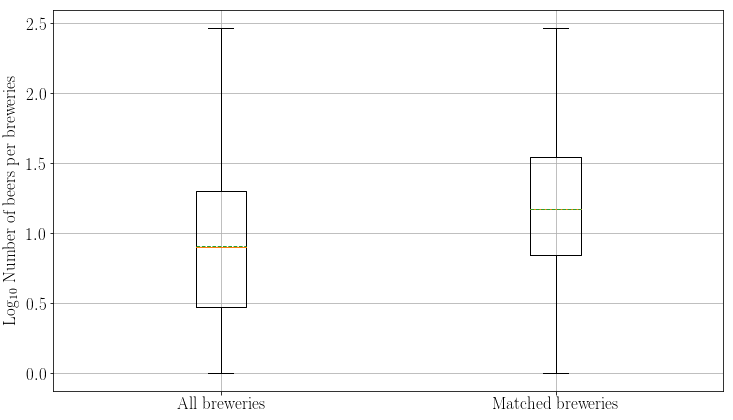

In [81]:
for key in df.keys():
    # QQ PLOTS
    plt.figure(figsize=(12,7))
    plt.rc('font', family='serif')
    plt.rc('font', size=17)
    
    quantiles1, quantiles2 = qq_plot(df[key]['nbr_beers'], matched[key]['nbr_beers'])
        
    plt.plot(quantiles1, quantiles2, 'ok', alpha=0.7, label='Quantiles')
    plt.plot([0, max(np.max(quantiles1),np.max(quantiles2))], [0, max(np.max(quantiles1),np.max(quantiles2))], 'b--', label='Perfect estimation')

    plt.grid()
    plt.xlabel('Number of beers per breweries for all breweries')
    plt.ylabel('Number of beers per breweries for matched breweries')
    plt.legend(title='QQ plot for {}'.format(key.upper()))
    plt.show()
    
    # BOXPLOTS
    plt.figure(figsize=(12,7))
    plt.rc('font', family='serif')
    plt.rc('font', size=17)
    
    arr1 = np.array(df[key]['nbr_beers'])
    arr1 = arr1[arr1>0]
    
    arr2 = np.array(matched[key]['nbr_beers'])
    arr2 = arr2[arr2>0]
    
    plt.boxplot([np.log10(arr1), np.log10(arr2)], showmeans=True, meanline=True)
    plt.grid()
    plt.ylabel('Log$_{10}$ Number of beers per breweries')
    plt.xticks([1, 2], ['All breweries', 'Matched breweries'])
    plt.show()

## Numbers breweries per country

In [33]:
matched = pd.read_csv(data_folder + 'matched/breweries.csv', header=[0,1])
ba = pd.read_csv(data_folder + 'ba/breweries.csv')
rb = pd.read_csv(data_folder + 'rb/breweries.csv')

def perc_country(arr, country):
    locs = np.array(arr)
    spec = []
    for l in locs:
        if country in l:
            spec.append(l)

    return len(spec)/len(locs)*100

In [34]:
countries = ['United State', 'Germany', 'England', 'Canada', 'Italy', 'Belgium', 'France', 'Spain', 'Australia', 'Netherlands', 'Switzerland']
for c in countries:
    print('{}:'.format(c))
    print('  Unmatched:')
    print('    BA: {:.1f}'.format(perc_country(ba['location'], c)))
    print('    RB: {:.1f}'.format(perc_country(rb['location'], c)))
    print('  Matched:')
    print('    Both: {:.1f}'.format(perc_country(matched['ba']['location'], c)))
    print()


United State:
  Unmatched:
    BA: 44.4
    RB: 28.6
  Matched:
    Both: 47.8

Germany:
  Unmatched:
    BA: 8.5
    RB: 8.3
  Matched:
    Both: 6.4

England:
  Unmatched:
    BA: 6.1
    RB: 8.8
  Matched:
    Both: 5.8

Canada:
  Unmatched:
    BA: 5.1
    RB: 3.7
  Matched:
    Both: 4.9

Italy:
  Unmatched:
    BA: 2.2
    RB: 4.3
  Matched:
    Both: 2.7

Belgium:
  Unmatched:
    BA: 2.0
    RB: 1.9
  Matched:
    Both: 2.5

France:
  Unmatched:
    BA: 2.4
    RB: 3.5
  Matched:
    Both: 2.3

Spain:
  Unmatched:
    BA: 1.9
    RB: 3.2
  Matched:
    Both: 2.3

Australia:
  Unmatched:
    BA: 2.4
    RB: 2.3
  Matched:
    Both: 2.2

Netherlands:
  Unmatched:
    BA: 1.5
    RB: 2.2
  Matched:
    Both: 2.1

Switzerland:
  Unmatched:
    BA: 0.7
    RB: 2.2
  Matched:
    Both: 0.7

